In [11]:
# Load libraries
import os
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from fancyimpute import KNN
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [12]:
# For maximizing Cell width of Jupyter Notebook Cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [13]:
# Set working directory
os.chdir("C:/Users/Mohammeds.Fakir/Employee Absenteesm Final/")

In [14]:
# For Not Displaying warnings
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Load data
employee_df = pd.read_excel("Absenteeism_at_work.xls")

# Exploratory Data Analysis

In [16]:
# Display Shape of dataframe (Rows, Columns)
employee_df.shape

(740, 21)

In [17]:
# Display Top 5 rows of dataframe
employee_df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [18]:
# Check Datatypes of all the columns present in the dataset
employee_df.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [19]:
# Check Number of Unique values present in each variable
employee_df.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [20]:
# Describe Columns of Dataframe and check mean, std, quartiles, min-max for all variables
employee_df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,...,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,...,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,...,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [21]:
################# Converting appropriate required Datatypes ####################
employee_df['Reason for absence'] = employee_df['Reason for absence'].replace(0,20)
employee_df['Month of absence'] = employee_df['Month of absence'].replace(0,np.nan)

#Converting colmnns into categorical factors as they contain unqiue values
category_column_names = ['ID','Reason for absence','Month of absence','Day of the week','Seasons','Disciplinary failure', 'Education', 
                         'Son', 'Social drinker','Social smoker', 'Pet']
for i in category_column_names :
    employee_df[i] = employee_df[i].astype('category')
    
continous_column_names = []


#Converting rest variables into float64 for standardization
for i in employee_df.columns:
    if i not in category_column_names:
        employee_df[i] = employee_df[i].astype('float')
        continous_column_names.append(i)

print("Categorical Columns : ",category_column_names)
print()
print("Continous Columns : ",continous_column_names)



Categorical Columns :  ['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet']

Continous Columns :  ['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']


In [39]:
#Make a copy of dataframe
df = employee_df.copy()

In [40]:
df.dtypes

ID                                 category
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense              float64
Distance from Residence to Work     float64
Service time                        float64
Age                                 float64
Work load Average/day               float64
Hit target                          float64
Disciplinary failure               category
Education                          category
Son                                category
Social drinker                     category
Social smoker                      category
Pet                                category
Weight                              float64
Height                              float64
Body mass index                     float64
Absenteeism time in hours           float64
dtype: object

# Missing Value Analysis

In [41]:
#Creating dataframe with number of missing values
missing_val = pd.DataFrame(df.isnull().sum())

#Reset the index to get row names as columns
missing_val = missing_val.reset_index()

#Rename the columns
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
missing_val

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df))*100

#Sort the rows according to decreasing missing percentage
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#Save output to csv file
missing_val.to_csv("Missing_percentage.csv", index = False)

missing_val

,Variables,Missing_percentage
0,Body mass index,4.189189
1,Absenteeism time in hours,2.972973
2,Height,1.891892
3,Work load Average/day,1.351351
4,Education,1.351351
5,Transportation expense,0.945946
6,Son,0.810811
7,Disciplinary failure,0.810811
8,Hit target,0.810811
9,Social smoker,0.540541


# Impute missing values


In [42]:
#Actual value = 30
#Mean = 26.67
#Median = 25
#KNN = 29.87
print(df['Body mass index'].iloc[0])

#Set the value of first row in Body mass index as NAN
#create missing value
df['Body mass index'].iloc[0] = np.nan

30.0


In [43]:
#Impute with mean
#df['Body mass index'] = df['Body mass index'].fillna(df['Body mass index'].mean())

#Impute with median
#df['Body mass index'] = df['Body mass index'].fillna(df['Body mass index'].median())



Imputing row 1/740 with 1 missing, elapsed time: 0.186
Imputing row 101/740 with 1 missing, elapsed time: 0.691
Imputing row 201/740 with 0 missing, elapsed time: 0.691
Imputing row 301/740 with 0 missing, elapsed time: 0.707
Imputing row 401/740 with 0 missing, elapsed time: 0.707
Imputing row 501/740 with 0 missing, elapsed time: 0.707
Imputing row 601/740 with 0 missing, elapsed time: 0.707
Imputing row 701/740 with 0 missing, elapsed time: 0.707


In [47]:
df.dtypes

ID                                 category
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense              float64
Distance from Residence to Work     float64
Service time                        float64
Age                                 float64
Work load Average/day               float64
Hit target                          float64
Disciplinary failure               category
Education                          category
Son                                category
Social drinker                     category
Social smoker                      category
Pet                                category
Weight                              float64
Height                              float64
Body mass index                     float64
Absenteeism time in hours           float64
dtype: object

In [46]:
#Round the values of categorical values
for i in category_column_names:
    df.loc[:,i] = df.loc[:,i].round()    
    df.loc[:,i] = df.loc[:,i].astype('category')

In [48]:
#Check if any missing values
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

# Distribution of data

Skewness :  5.7347239798591385
Kurtosis :  38.80911490346977


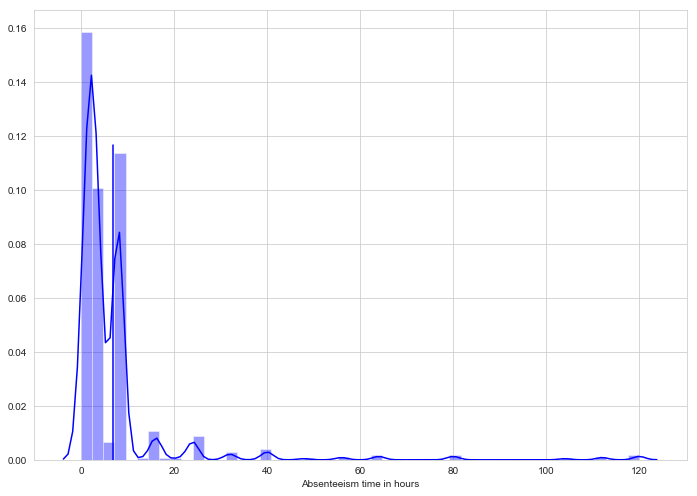

In [316]:
#Distribution of Response Variable 'Absent in Hours'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.distplot(df['Absenteeism time in hours'], color = 'b')
ax = plt.axvline(df['Absenteeism time in hours'].mean(), 0,0.7, color='b')

from scipy.stats import kurtosis, skew
print('Skewness : ', skew(df['Absenteeism time in hours']))
print('Kurtosis : ', kurtosis(df['Absenteeism time in hours']))

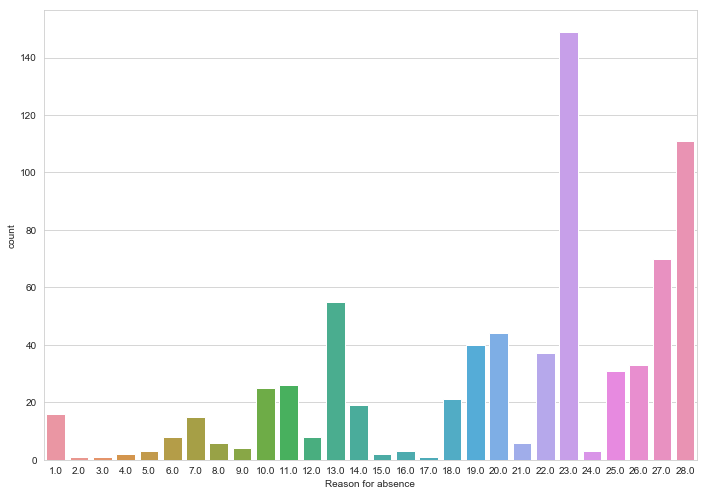

In [317]:
################################## Univariate Analysis of Categorical Variables ##########################################

# Frequency Countplot for Categorical variable
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.set_style("whitegrid")
sns.countplot(x='Reason for absence', data=df);

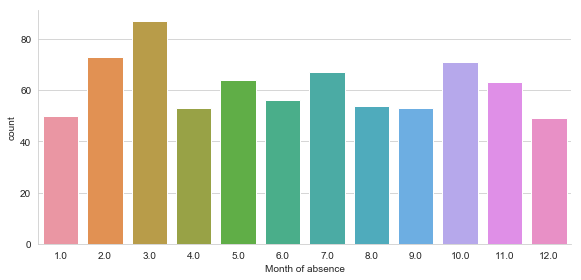

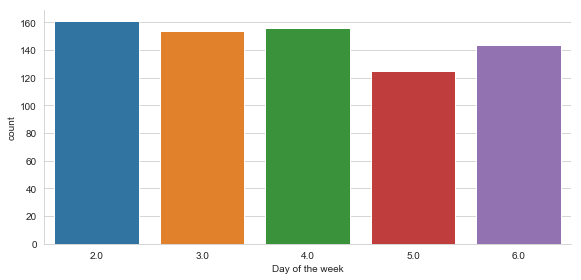

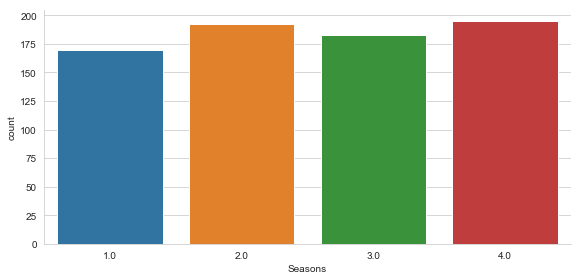

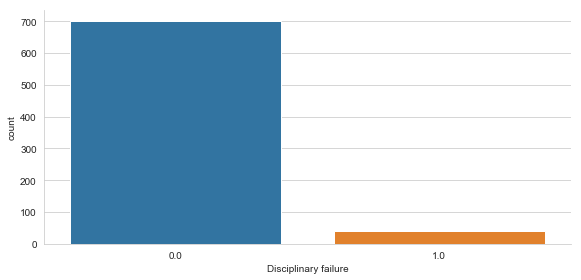

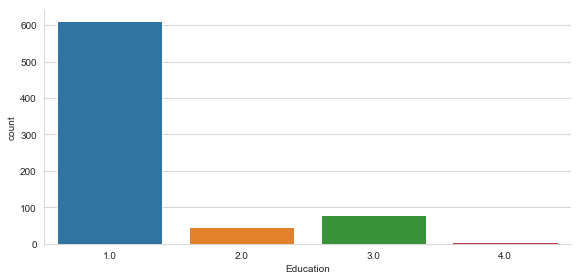

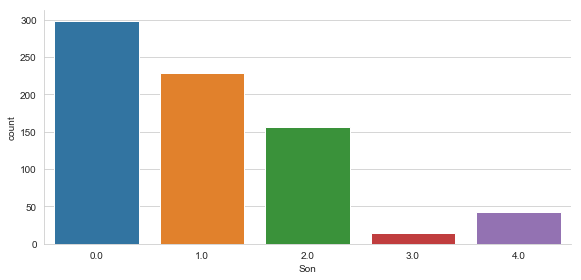

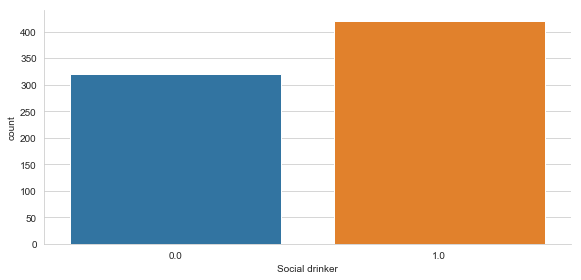

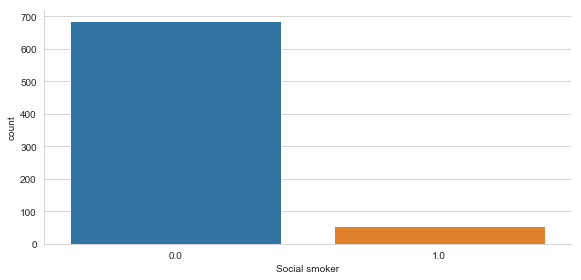

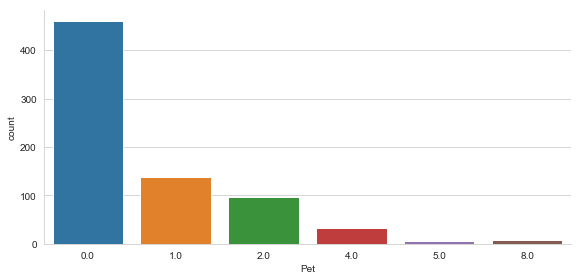

In [318]:
# factorplot for all categorical variables
for i in category_column_names:
    if i not in ['ID','Reason for absence']:
        sns.factorplot(data=df,x=i,kind='count',size=4,aspect=2)

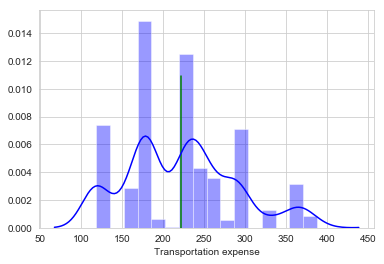

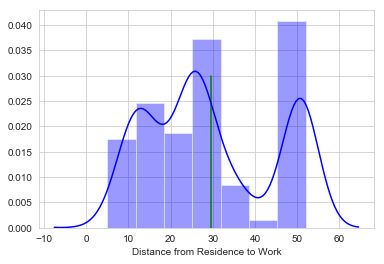

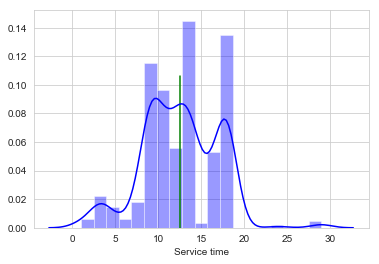

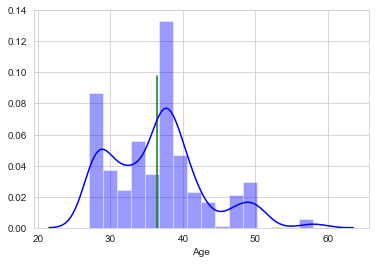

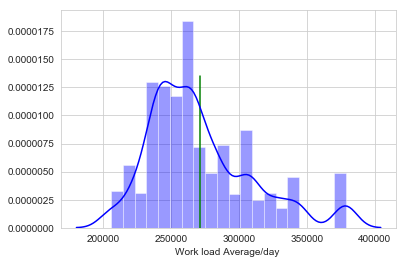

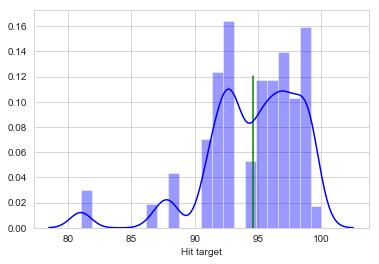

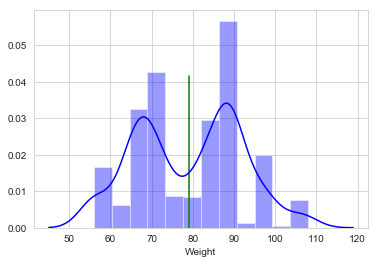

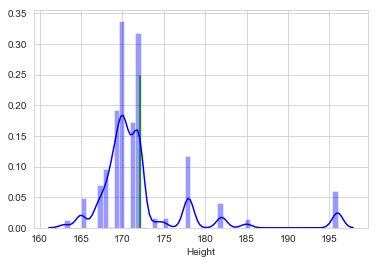

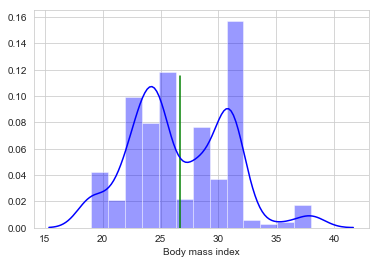

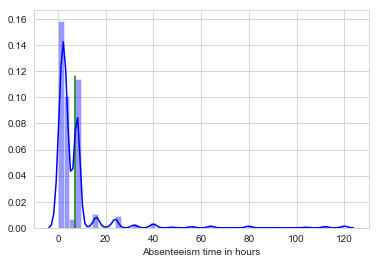

In [319]:
################################## Univariate Analysis of Numerical Variables ##########################################

# Histogram - Distribution plot for all continous variables
for i,col in enumerate(continous_column_names):
    #fig, ax = plt.subplots()
    #fig.set_size_inches(11.7, 8.27)
    plt.figure(i)
    plt.axvline(df[col].mean(), 0,0.7, color = 'g')
    sns.distplot(df[col], color = 'b')
    

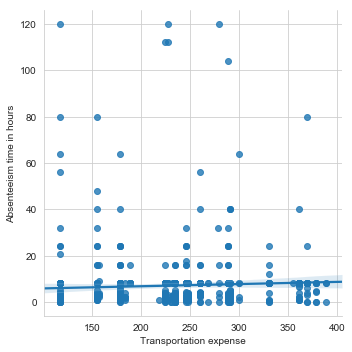

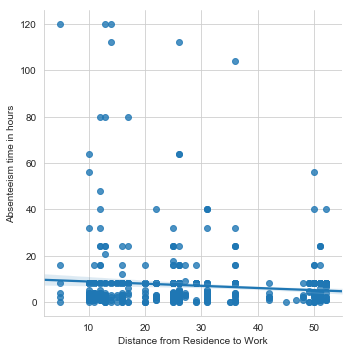

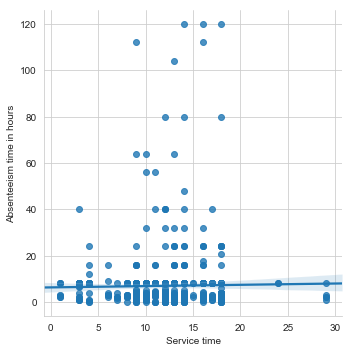

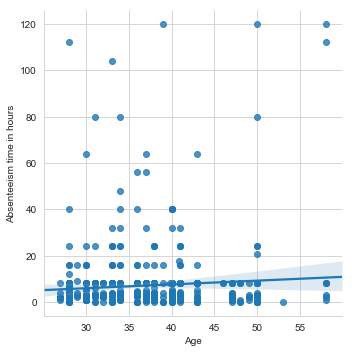

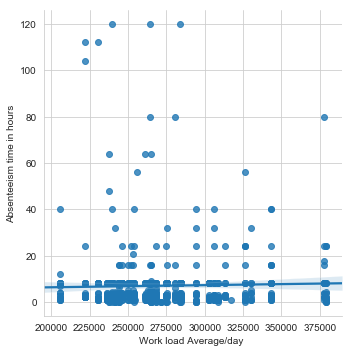

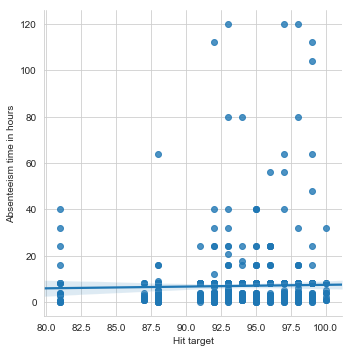

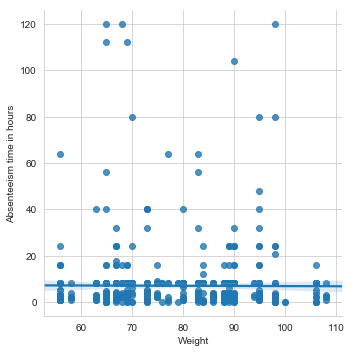

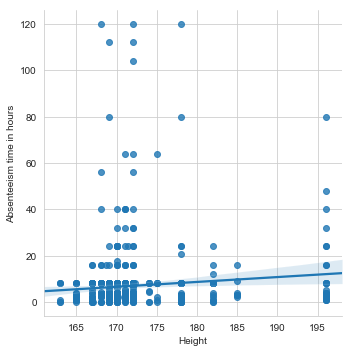

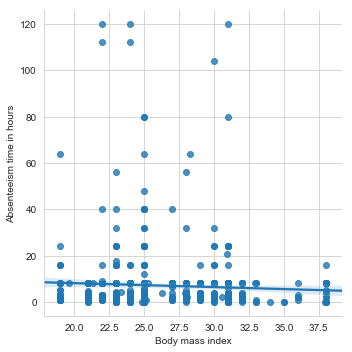

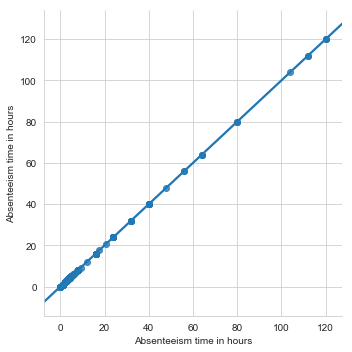

In [320]:
######################## Bivariate Analysis of Numerical Variables ################################
# Bivariate Analysis of all continous variables with Target Variable.
for i,col in enumerate(continous_column_names):
    sns.lmplot(x=col, y="Absenteeism time in hours", data=df)    

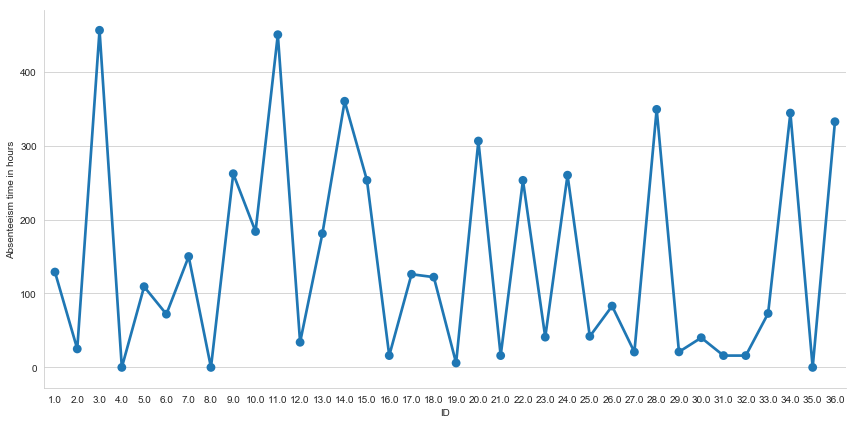

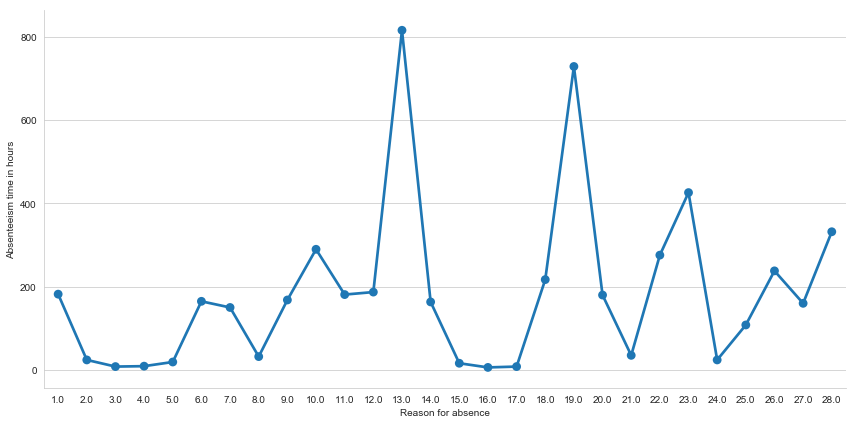

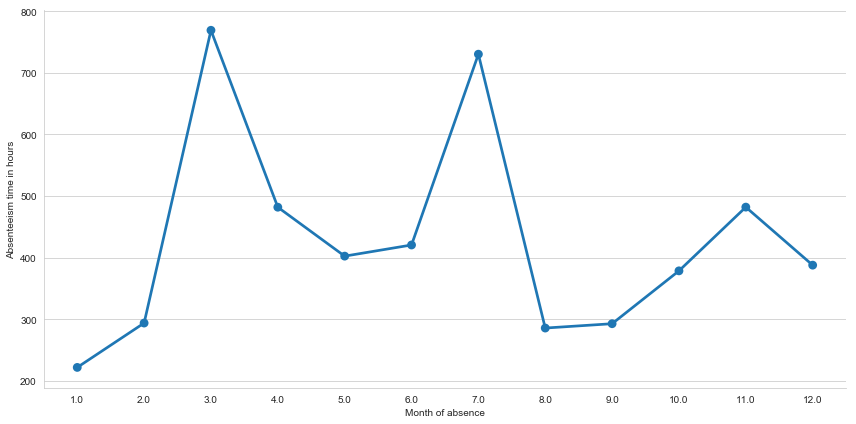

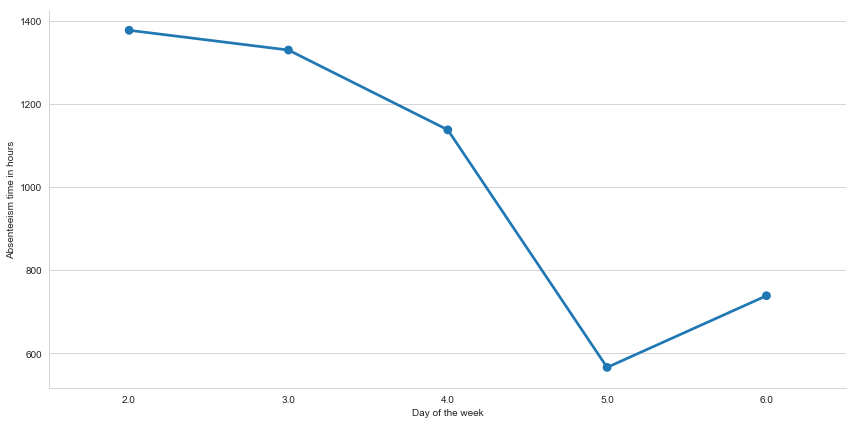

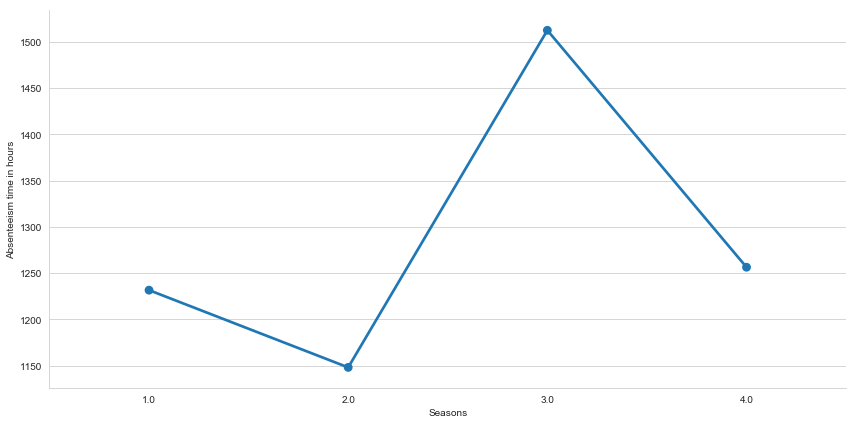

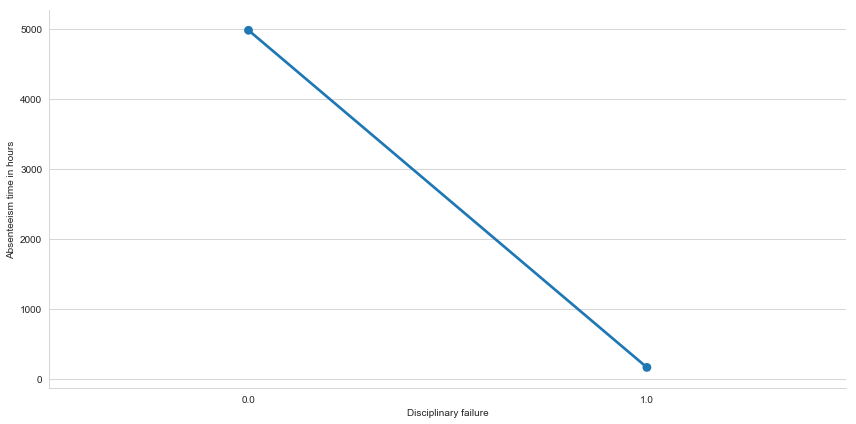

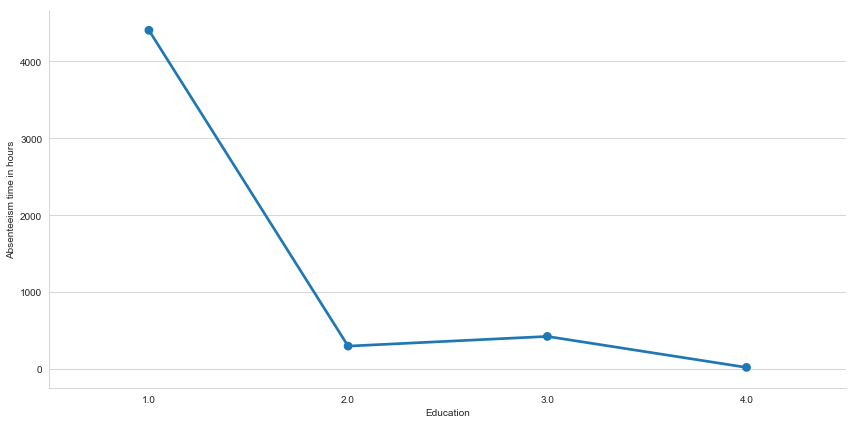

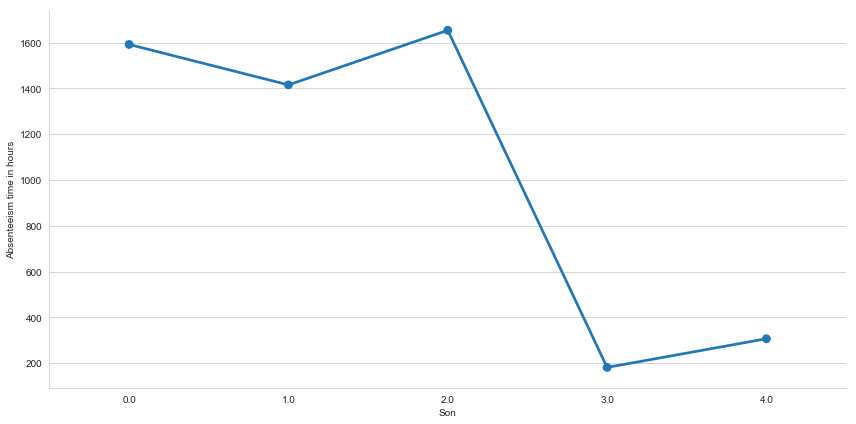

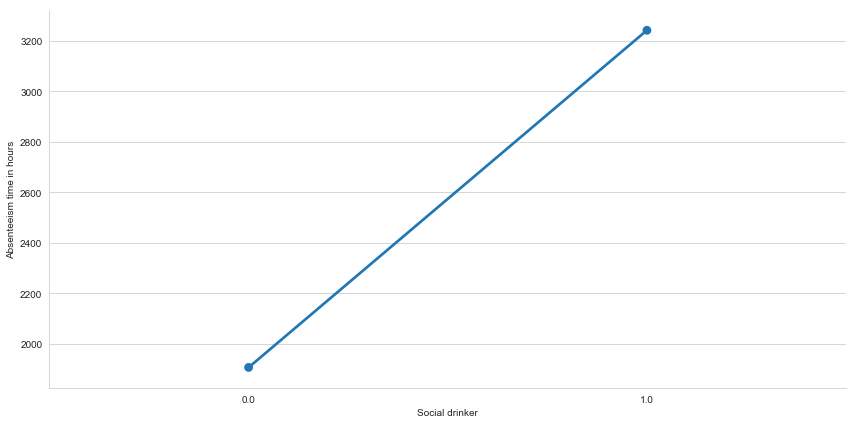

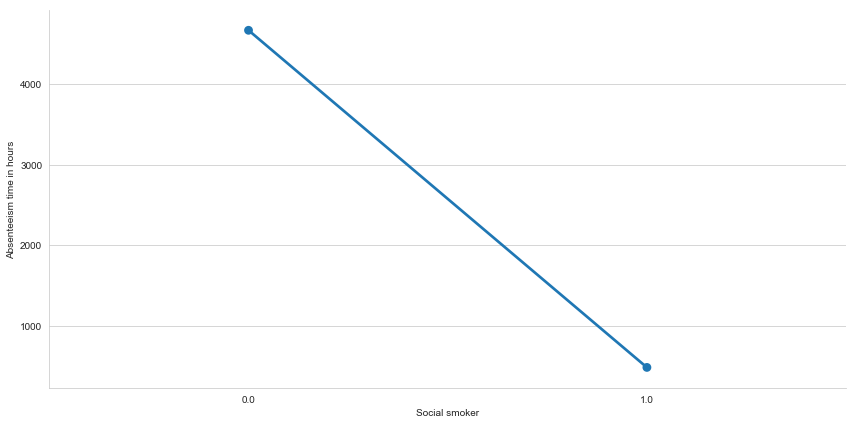

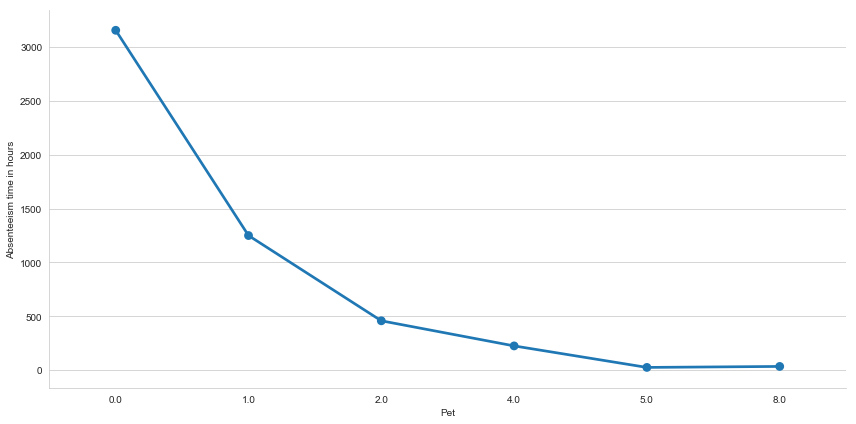

In [321]:
# Bivariate Analysis of all categorical variables with Target Variable.
for col in category_column_names:
    df_cat = pd.DataFrame(df.groupby([col], as_index=False).sum())
    sns.catplot(x=col, y="Absenteeism time in hours", data=df_cat.reset_index(), kind="point", height=6, aspect=2)

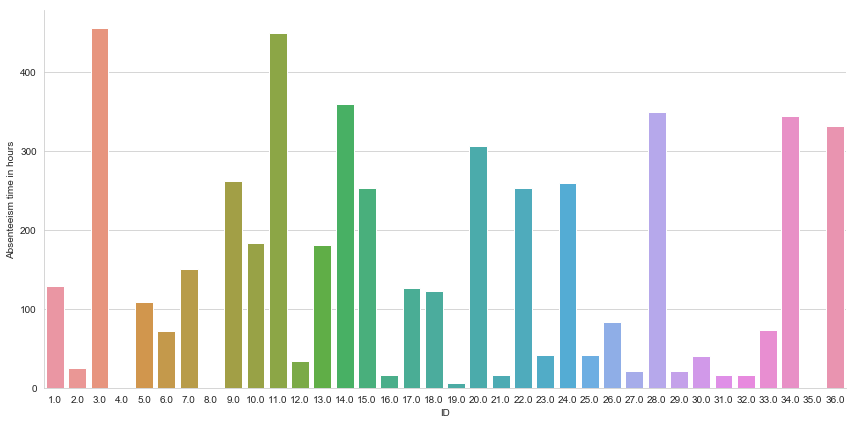

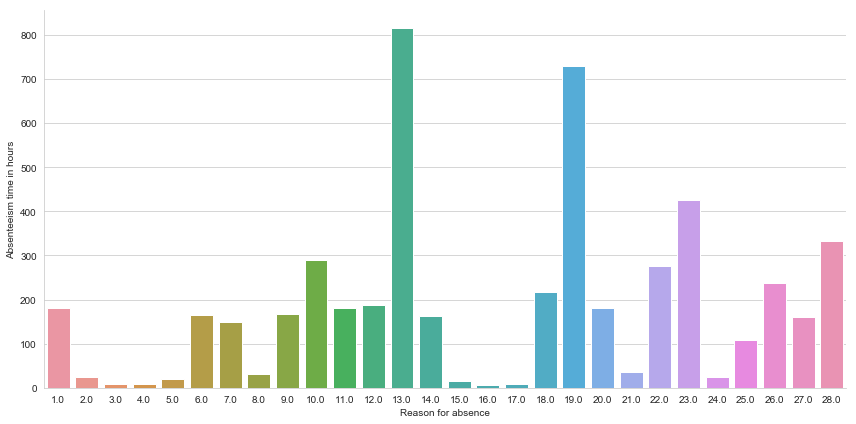

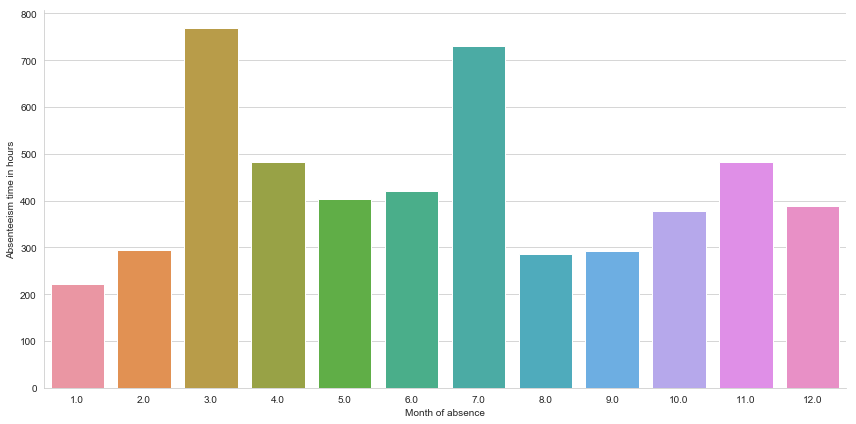

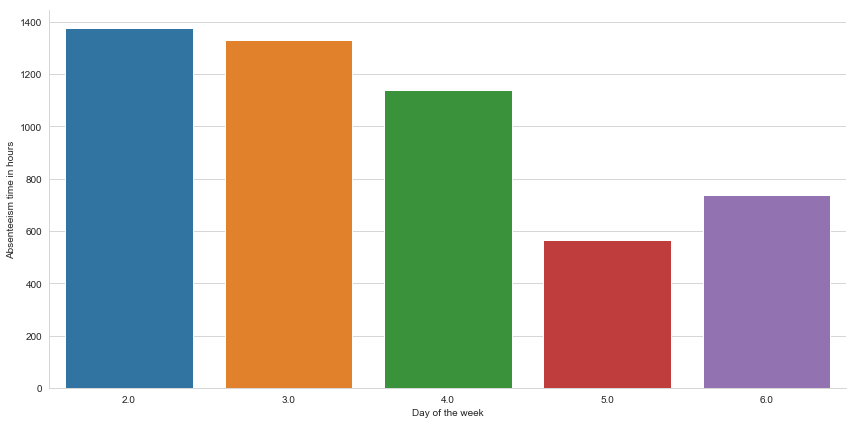

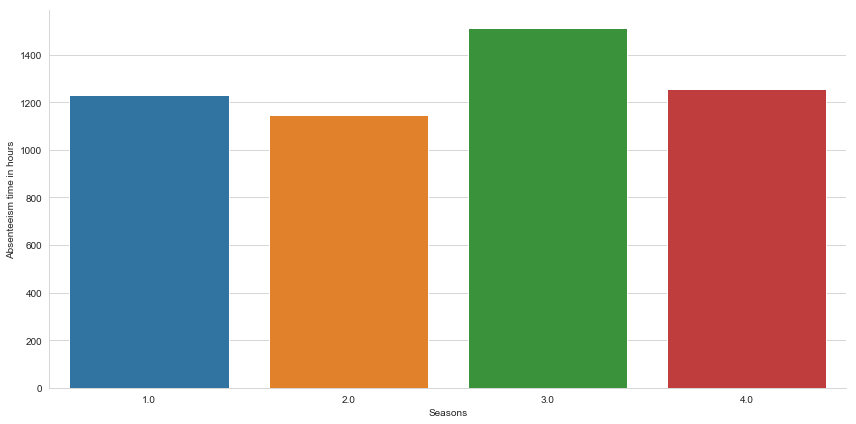

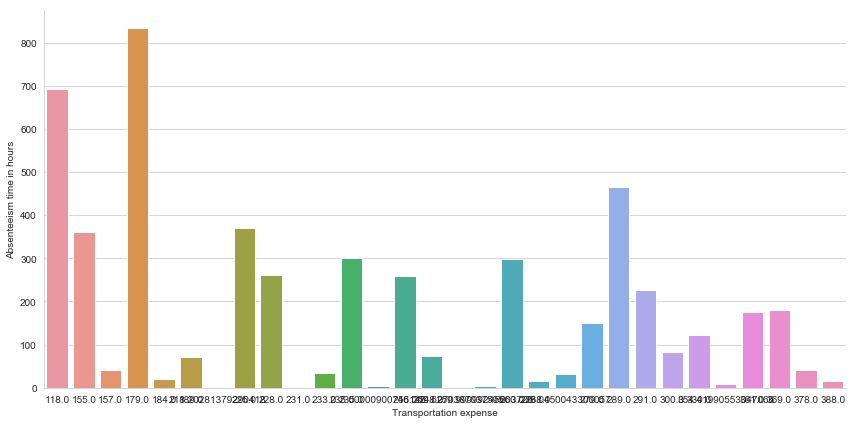

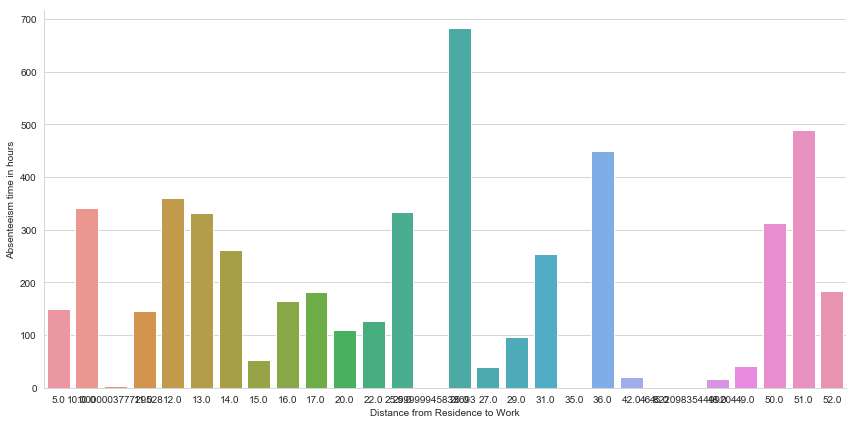

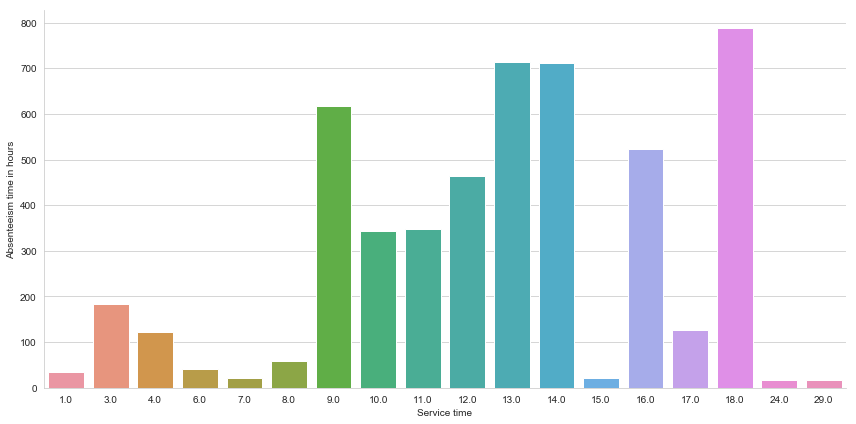

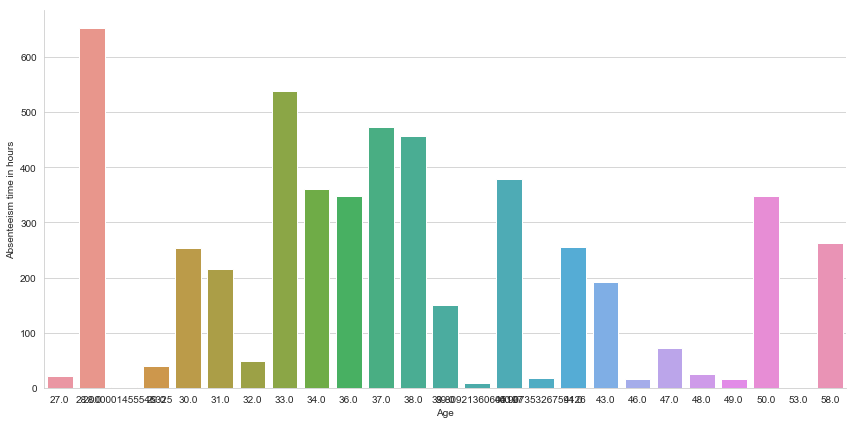

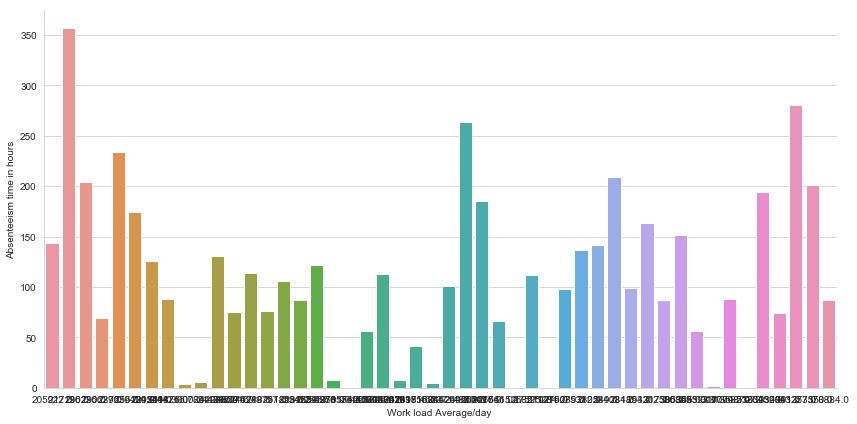

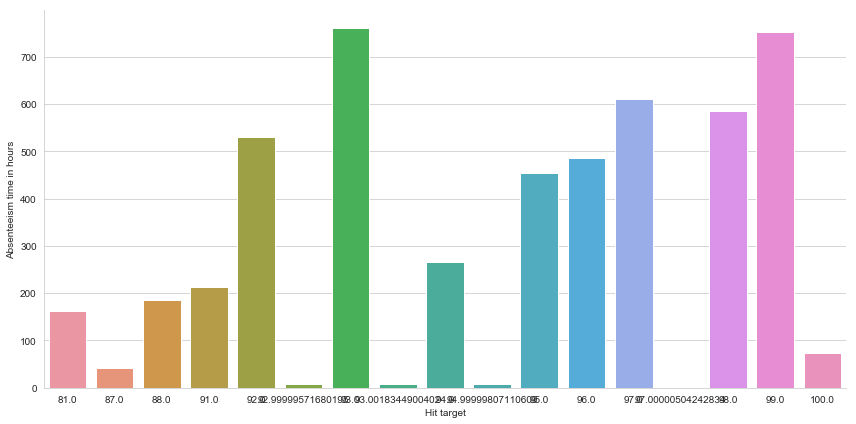

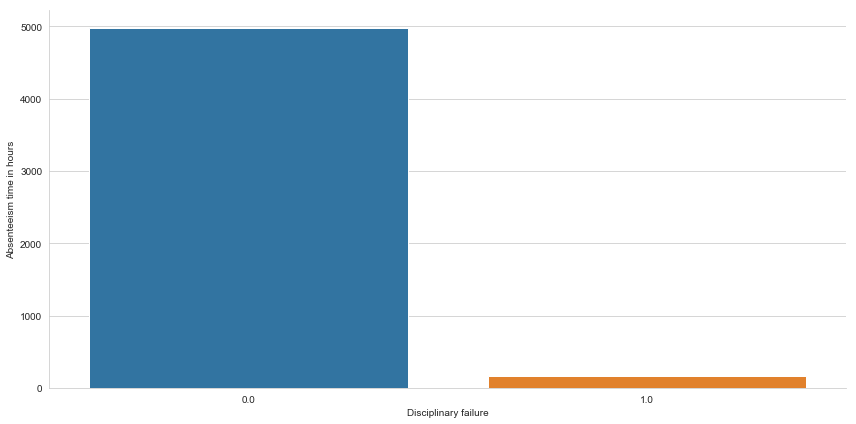

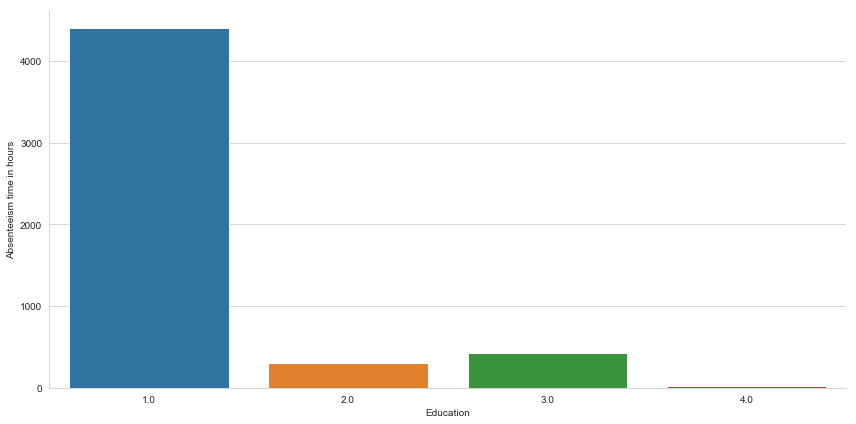

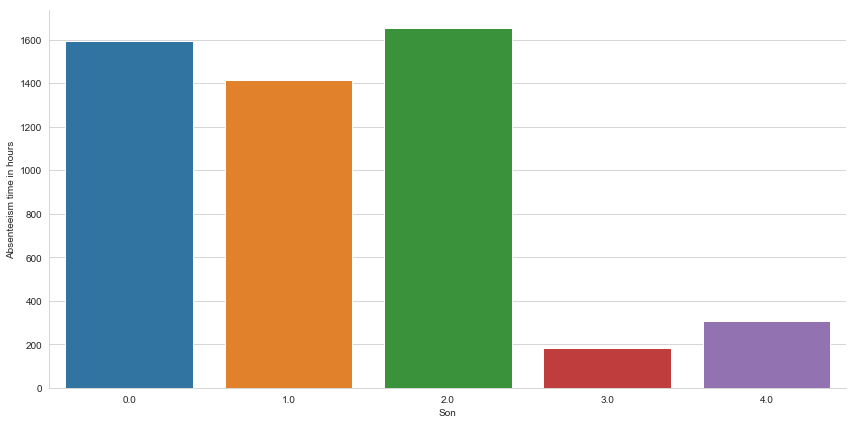

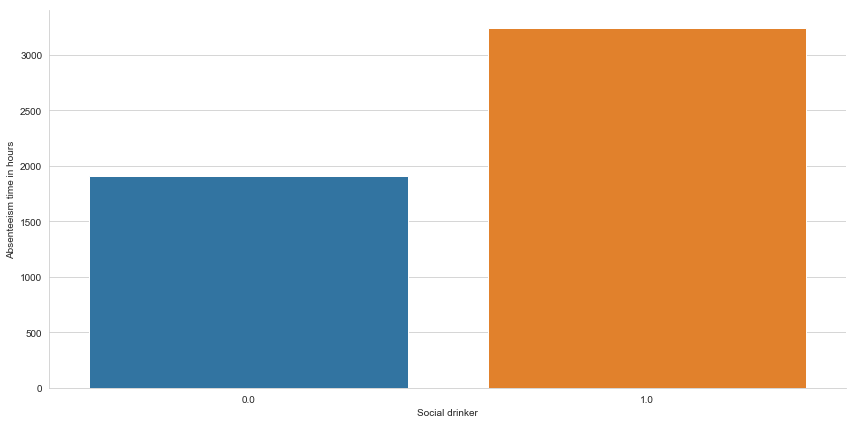

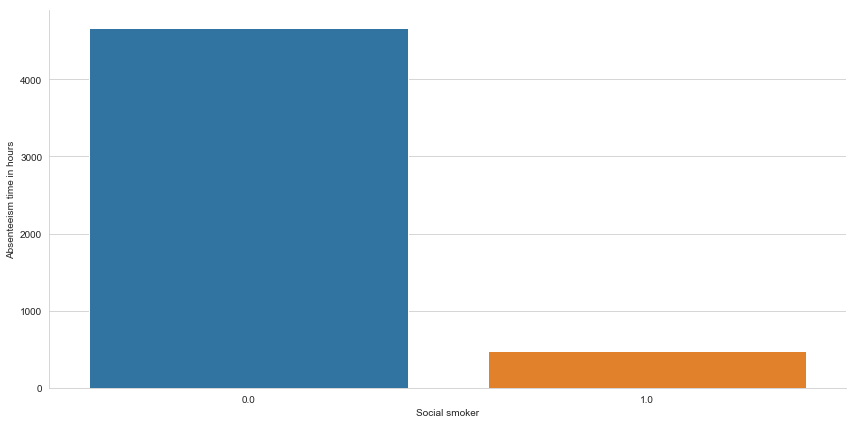

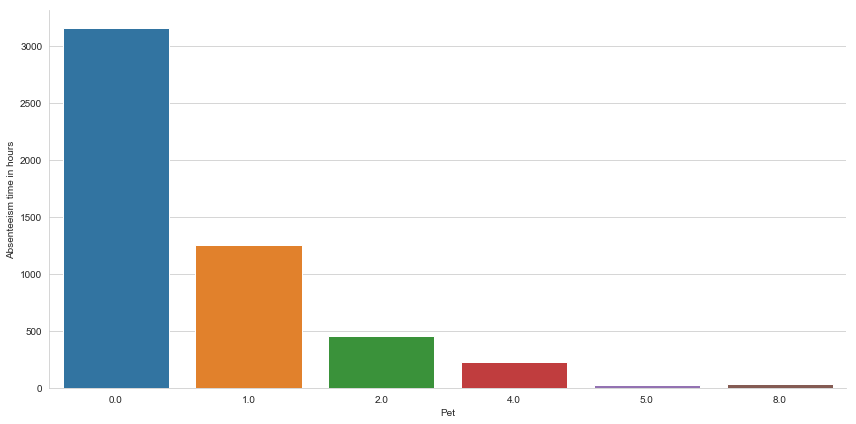

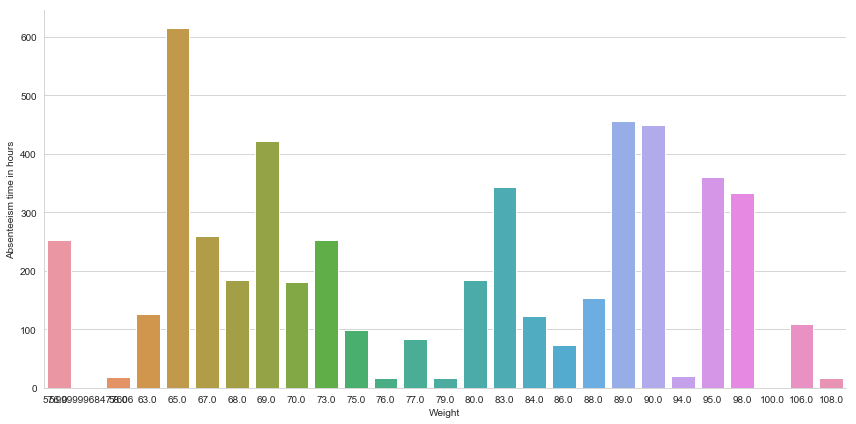

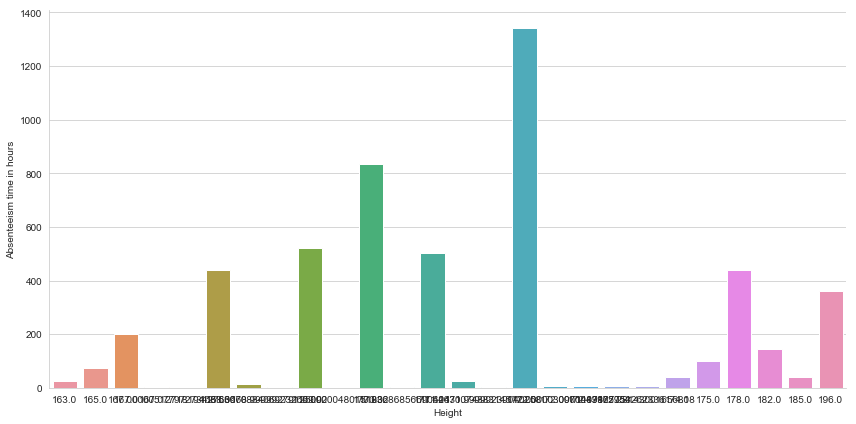

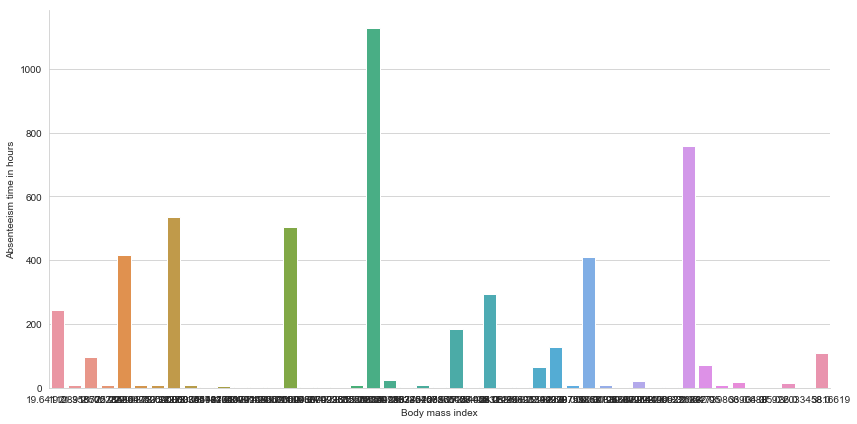

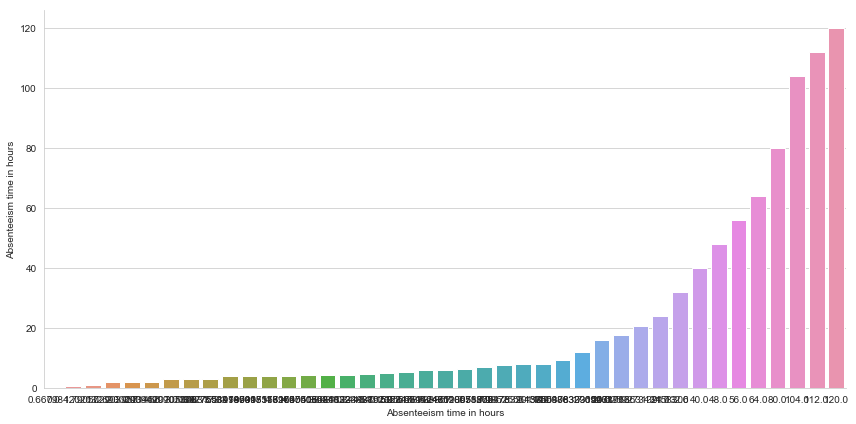

In [322]:
for col in df.columns:
    df_cat = pd.DataFrame(df.groupby([col], as_index=False).sum())
    sns.catplot(x=col, y="Absenteeism time in hours", data=df_cat.reset_index(), kind="bar", height=6, aspect=2)

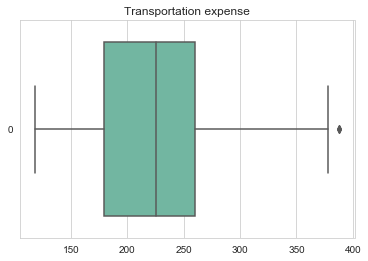

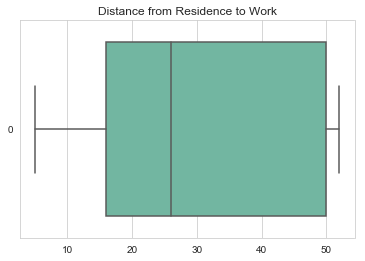

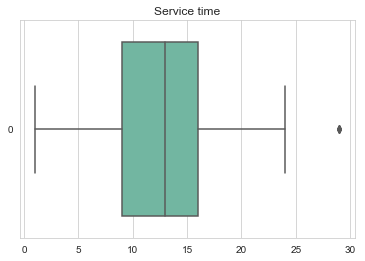

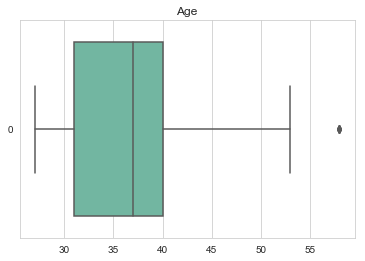

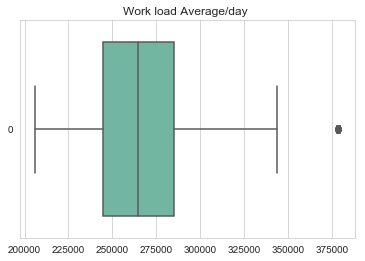

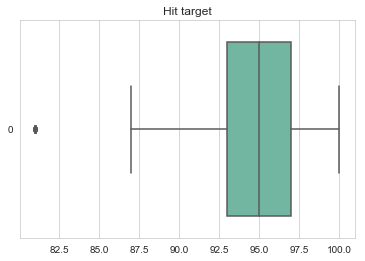

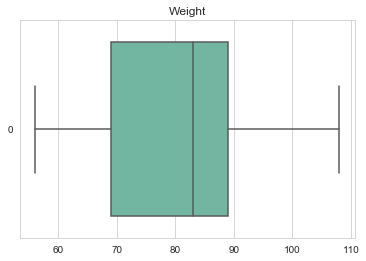

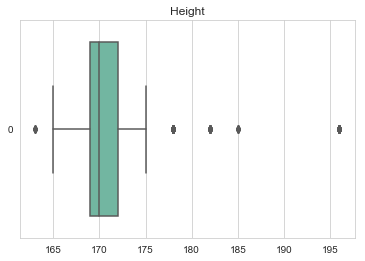

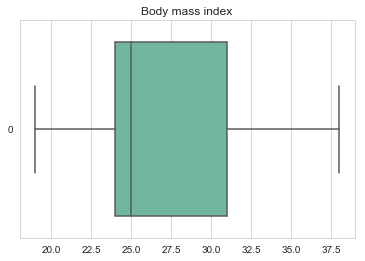

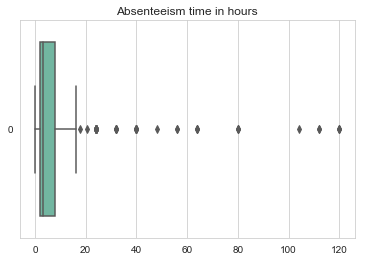

In [323]:
#################### Outlier Analysis #############################

### Checking Outliers using Boxplot Method

for i,col in enumerate(continous_column_names):
    #fig, ax = plt.subplots()
    #fig.set_size_inches(11.7, 8.27)
    plt.figure(i)
    plt.title(col)
    sns.boxplot(data=df[col], orient="h", palette="Set2")
    

# Outlier Analysis

In [1]:
#Check for outliers using boxplots
for i in continous_column_names:
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(df[i], [75,25])
    
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    # Replacing all the outliers value to NA
    df.loc[df[i]< minimum,i] = np.nan
    df.loc[df[i]> maximum,i] = np.nan


# Impute missing values with KNN
df = pd.DataFrame(KNN(k = 3).complete(df), columns = df.columns)
# Checking if there is any missing value
df.isnull().sum()

NameError: name 'continous_column_names' is not defined

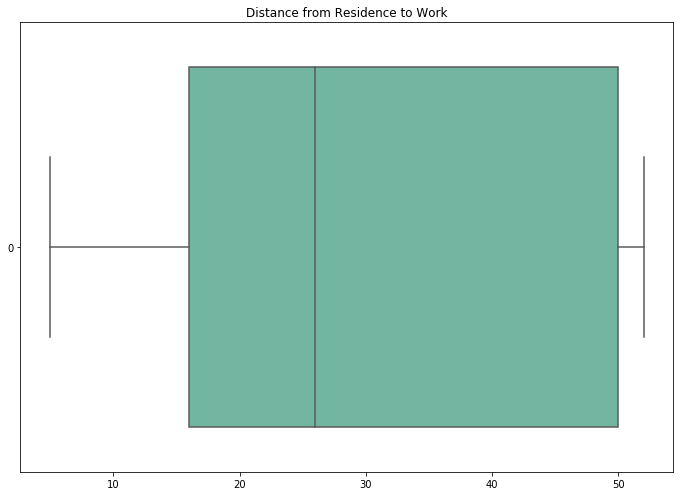

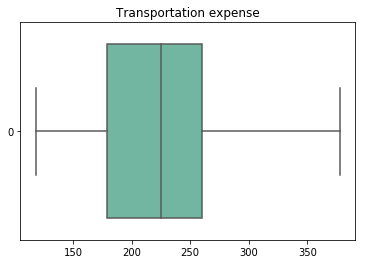

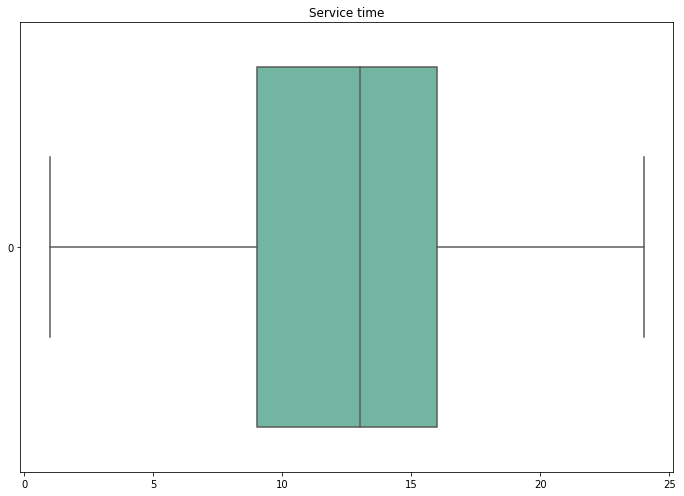

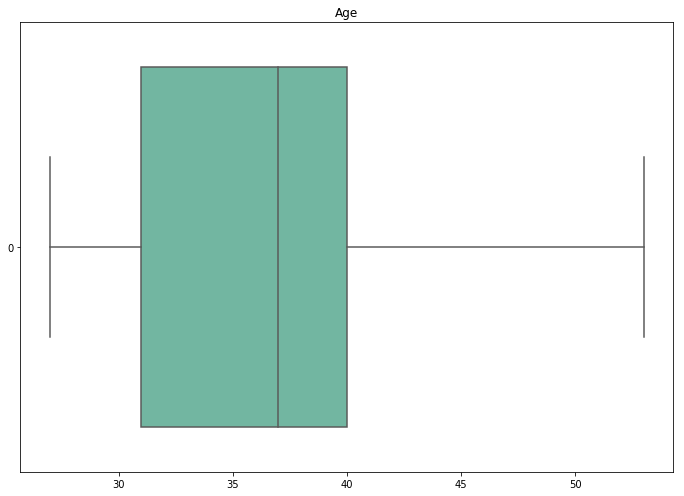

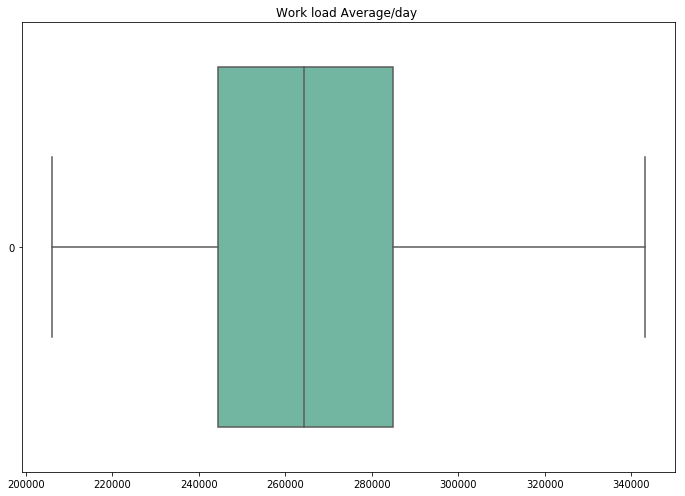

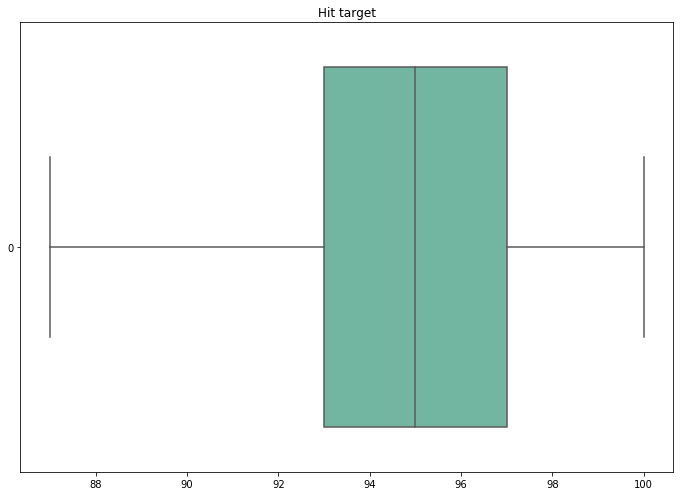

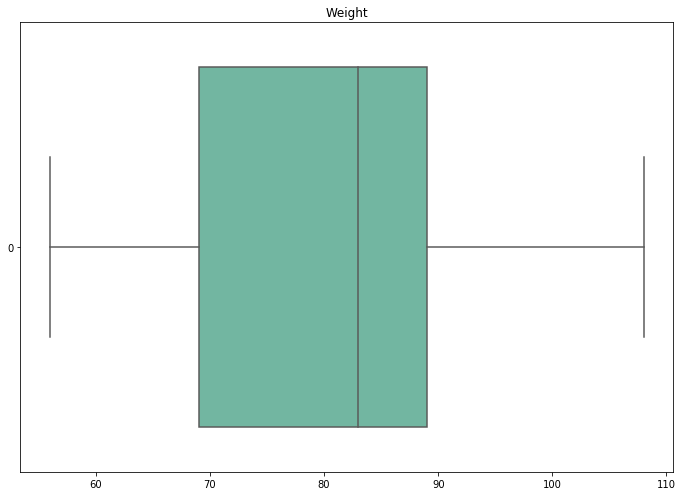

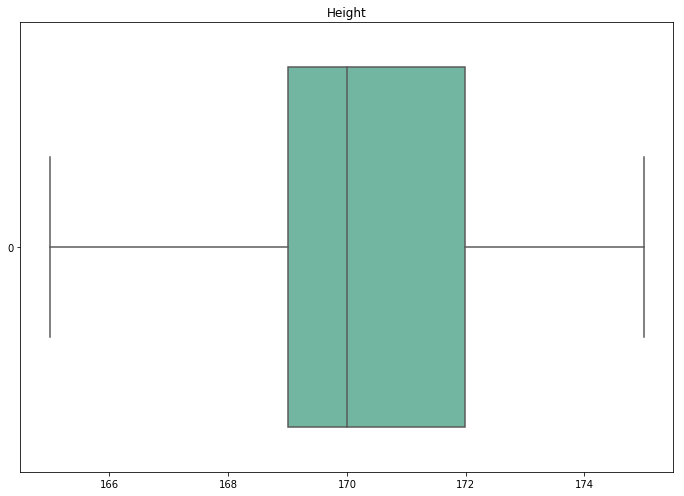

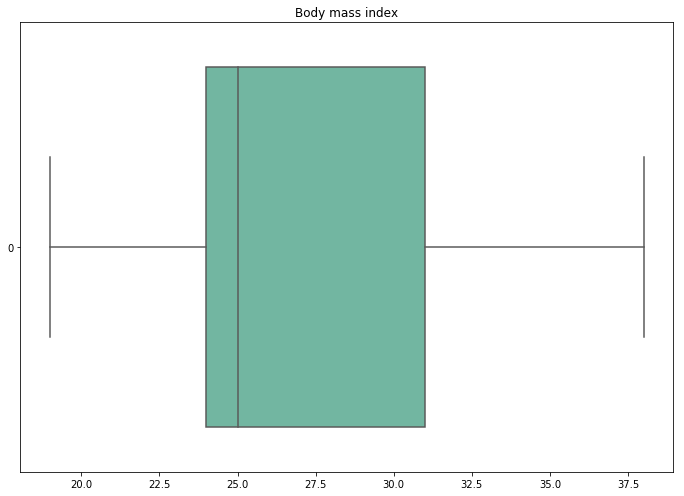

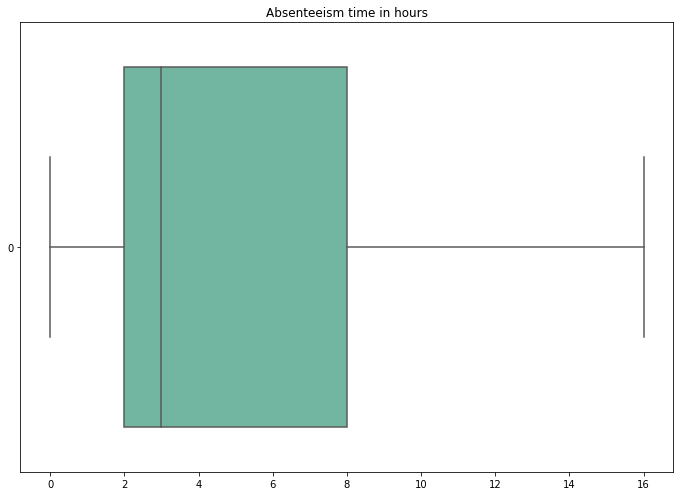

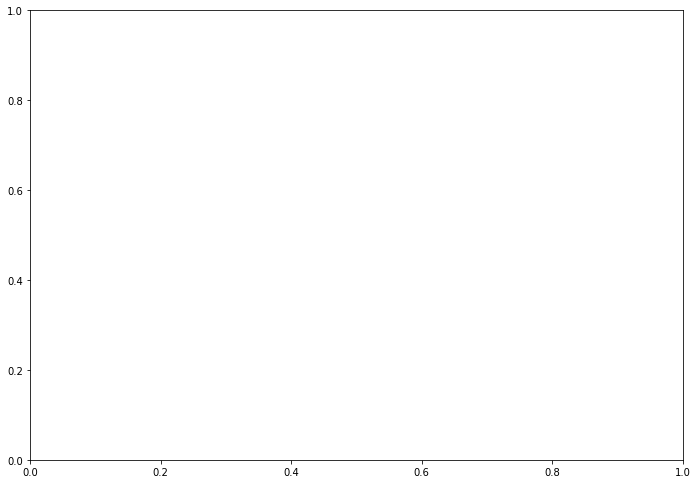

In [50]:
#Check for outliers in data using boxplot
for i,col in enumerate(continous_column_names):
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    plt.figure(i)
    plt.title(col)
    sns.boxplot(data=df[col], orient="h", palette="Set2")

# Feature Selection

In [51]:
# Create df from continous variables
df_corr = df.loc[:,continous_column_names]

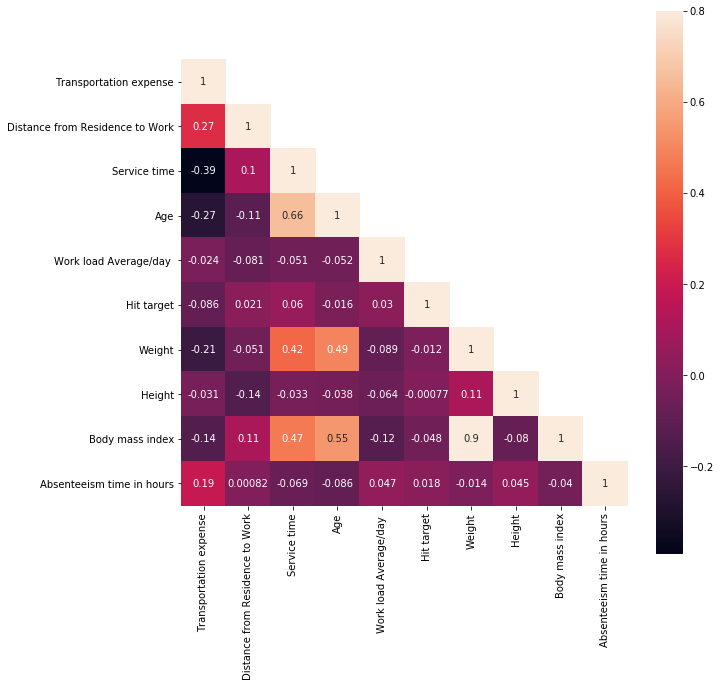

In [52]:
# Corelation graph for checking Multicollinearity for continous variables
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot heatmap using seaborn library
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
ax = sns.heatmap(corr, mask=mask, vmax=.8, square=True, annot=True, ax=ax)


In [53]:
#loop for ANOVA test Since the target variable is continuous
for i in category_column_names:
    f, p = stats.f_oneway(df[i], df["Absenteeism time in hours"])
    print("P value for variable "+str(i)+" is "+str(p))

P value for variable ID is 8.383856717303618e-173
P value for variable Reason for absence is 0.0
P value for variable Month of absence is 8.105143582162465e-28
P value for variable Day of the week is 0.0007497935392698595
P value for variable Seasons is 1.2980261103914935e-41
P value for variable Disciplinary failure is 6.3643083756072e-193
P value for variable Education is 8.440130161407405e-110
P value for variable Son is 3.8954598960478655e-120
P value for variable Social drinker is 7.91411410143563e-157
P value for variable Social smoker is 2.3711432055182457e-191
P value for variable Pet is 5.113299908473813e-132


In [54]:
# Feature Elimination Since it contains redundant Information and No Information ['Weight']
drop_var = ['Weight']
df = df.drop(drop_var, axis = 1)

In [55]:
# Updating the Continuous and Categorical Variables
continous_column_names.remove('Weight')

In [56]:
#Make a copy of clean data
clean_data = df.copy()

# Feature Scaling

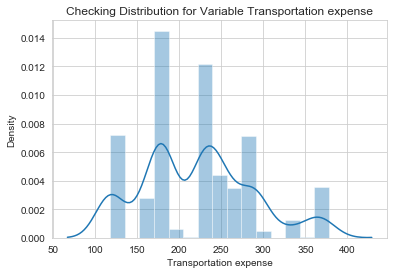

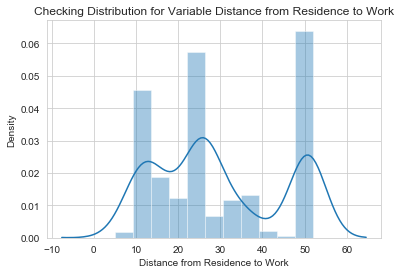

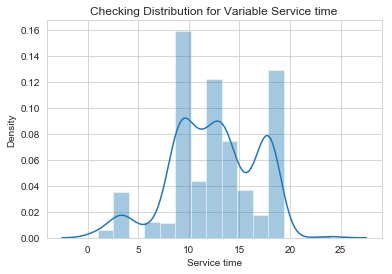

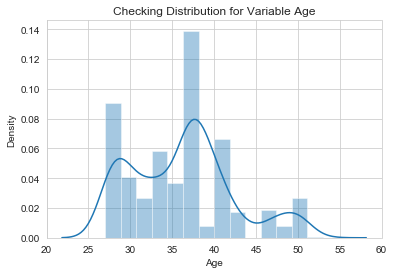

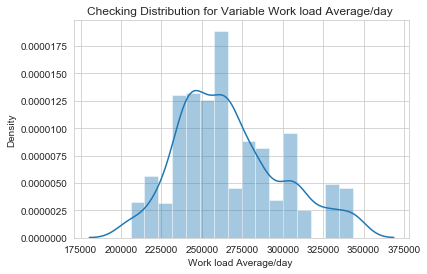

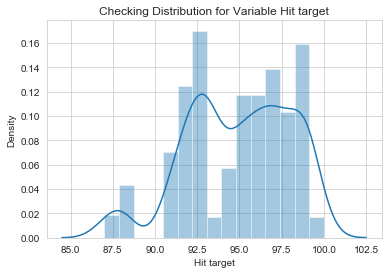

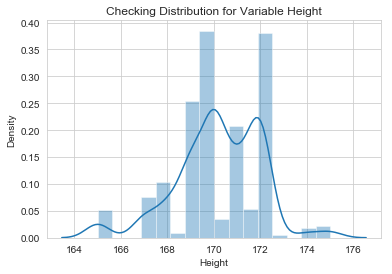

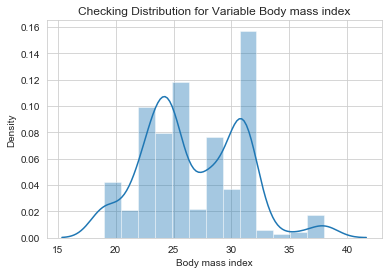

In [332]:
#Normality check
for i in continous_column_names:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(df[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [57]:
#Normalization of continuous variables
for i in continous_column_names:
    if i == 'Absenteeism time in hours':
        continue
    df[i] = (df[i] - df[i].min())/(df[i].max()-df[i].min())

# Machine Learning Models

In [58]:
##################### One hot Encoding #####################
# Encoding Categorical Data
df = pd.get_dummies(data = df, columns = category_column_names)

# Copying dataframe
df1 = df.copy()

In [59]:
df.dtypes

Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
ID_1.0                               uint8
ID_2.0                               uint8
ID_3.0                               uint8
ID_4.0                               uint8
ID_5.0                               uint8
ID_6.0                               uint8
ID_7.0                               uint8
ID_8.0                               uint8
ID_9.0                               uint8
ID_10.0                              uint8
ID_11.0                              uint8
ID_12.0                              uint8
ID_13.0                              uint8
ID_14.0                              uint8
ID_15.0    

In [60]:
#### Converting again uint8 to categorical data type
for i in range(0, df.shape[1]):
    if(df.iloc[:,i].dtypes == "uint8"):
        df.iloc[:,i] = df.iloc[:,i].astype('category')

In [61]:
#Get number of rows and columns
df.shape

(740, 115)

In [338]:
df.dtypes

Transportation expense              float64
Distance from Residence to Work     float64
Service time                        float64
Age                                 float64
Work load Average/day               float64
Hit target                          float64
Height                              float64
Body mass index                     float64
Absenteeism time in hours           float64
ID_1.0                             category
ID_2.0                             category
ID_3.0                             category
ID_4.0                             category
ID_5.0                             category
ID_6.0                             category
ID_7.0                             category
ID_8.0                             category
ID_9.0                             category
ID_10.0                            category
ID_11.0                            category
ID_12.0                            category
ID_13.0                            category
ID_14.0                         

In [62]:
#Observe the first row
df.head(1)

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Height,Body mass index,Absenteeism time in hours,ID_1.0,...,Social drinker_0.0,Social drinker_1.0,Social smoker_0.0,Social smoker_1.0,Pet_0.0,Pet_1.0,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0
0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.7,0.572146,4.0,0,...,0,1,1,0,0,1,0,0,0,0


In [63]:
#### Reordering the columns so 'cnt' gets to last column
cols = list(df.columns.values)
cols.remove('Absenteeism time in hours')
cols.insert(len(cols), 'Absenteeism time in hours')
df = df[cols]

In [341]:
df.head(1)

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Height,Body mass index,ID_1.0,ID_2.0,...,Social drinker_1.0,Social smoker_0.0,Social smoker_1.0,Pet_0.0,Pet_1.0,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0,Absenteeism time in hours
0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.7,0.578947,0,0,...,1,1,0,0,1,0,0,0,0,4.0


In [64]:
## Divide the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df.iloc[:, df.columns != 'Absenteeism time in hours'], df.iloc[:, 114], test_size = 0.20, random_state = 1)

In [65]:
################ Evaluation Metrics ###########################
## Calculate MAPE 
def MAPE(y_act, y_pred):
    mape = np.mean(np.abs((y_act - y_pred)/ y_act))*100
    return mape

## Calculate RMSE
def RMSE(y_test,y_predict):
    mse = np.mean((y_test-y_predict)**2)
    rmse=np.sqrt(mse)
    return rmse

## Calculate Accuracy
def ACCURACY(mape):
    accuracy = abs(100 - np.mean(mape))
    return accuracy

# Decision Tree

     predicted  actual
681   4.808662     8.0
257   7.154164     2.0
527   8.000000     8.0
637   4.808662     8.0
429   1.666667     4.0

RMSE : 2.990056476394921
R^2 : 0.21331632298309


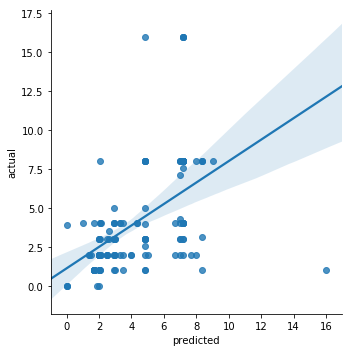

In [66]:
# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor

#Build decsion tree using DecisionTreeRegressor
c50_model = DecisionTreeRegressor(random_state = 1, max_depth = 8, min_samples_split = 4).fit(X_train,y_train)

#Perdict for test cases
c50_predictions = c50_model.predict(X_test)

#Create data frame for actual and predicted values
decision_tree_eval = pd.DataFrame({'predicted':c50_predictions, 'actual': y_test})
print(decision_tree_eval.head())

print()

#Calculate RMSE and R-squared value
print("RMSE : "+str(RMSE(y_test, c50_predictions)))
print("R^2 : "+str(r2_score(y_test, c50_predictions)))
#print("MAPE : "+str(MAPE(y_test, c50_predictions)))
#print("Accuracy : "+str(ACCURACY(MAPE(y_test, c50_predictions))))


#Scatter plot of Actual vs Predicted for Decision Tree
ax = sns.lmplot(x="predicted", y="actual", data=decision_tree_eval)

# Random Forest


     predicted  actual
681   4.884946     8.0
257   3.752826     2.0
527   5.570124     8.0
637   3.471286     8.0
429   3.248881     4.0

RMSE : 2.7128622875119204
R^2 : 0.35241489225318423


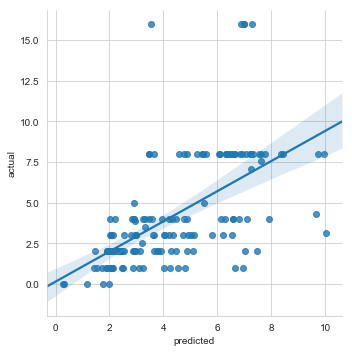

In [345]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

#Build random forest using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 1000, random_state = 1).fit(X_train,y_train)

#Perdict for test cases
rf_predictions = rf_model.predict(X_test)

#Comparison Dataframe for Random Forest
randomforest_eval = pd.DataFrame({'predicted':rf_predictions, 'actual': y_test})
print(randomforest_eval.head())

print()
#Calculate RMSE and R-squared value
print("RMSE : "+str(RMSE(y_test, rf_predictions)))
print("R^2 : "+str(r2_score(y_test, rf_predictions)))

#Scatter plot of Actual vs Predicted for Random Forest
ax = sns.lmplot(x="predicted", y="actual", data=randomforest_eval)

# Linear Regression


                             Names  Coefficients
0           Transportation expense -1.132152e+01
1  Distance from Residence to Work  7.112966e+07
2                     Service time  1.798667e+02
3                              Age  1.562919e+01
4           Work load Average/day   1.502310e-01

     predicted  actual
681   4.179688     8.0
257   4.539062     2.0
527   7.820312     8.0
637   4.804688     8.0
429   2.679688     4.0

RMSE : 1734226070890.029
R^2 : -2.6463834858974847e+23


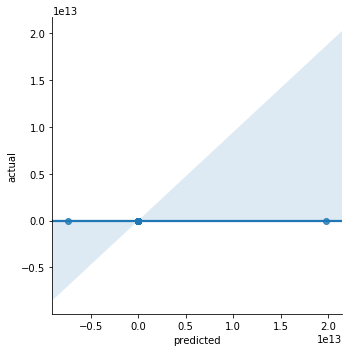

In [68]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

#Train the model
linear_regressor = LinearRegression().fit(X_train , y_train)

#Predict for test cases
linear_predictions = linear_regressor.predict(X_test)

#Get Linear Regression Equation along with Co-efficients
df_linear_coeff = pd.DataFrame(zip(df.columns, linear_regressor.coef_.tolist()), columns=['Names', 'Coefficients'])
print(df_linear_coeff.head())

print()

#Create data frame for actual and predicted values
linear_eval = pd.DataFrame({'predicted':linear_predictions, 'actual': y_test})
print(linear_eval.head())

print()

#Calculate RMSE and R-squared value
print("RMSE : "+str(RMSE(y_test, linear_predictions)))
print("R^2 : "+str(r2_score(y_test, linear_predictions)))

#Scatter plot of Actual vs Predicted for Random Forest
ax = sns.lmplot(x="predicted", y="actual", data=linear_eval)

# XG Boost


In [69]:
df_xgboost = df
for i in range(0, df_xgboost.shape[1]):
        df_xgboost.iloc[:,i] = df_xgboost.iloc[:,i].astype('float')
        
## Divide the dataset into train and test
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split( df_xgboost.iloc[:, df_xgboost.columns != 'Absenteeism time in hours'], df_xgboost.iloc[:, 114], test_size = 0.20, random_state = 1)

RMSE : 3.1344202973199593
R^2 : 0.13551827211981937


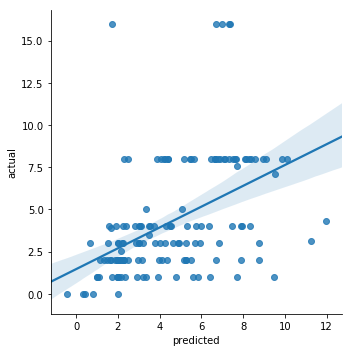

In [70]:
# Importing xgboost library
import xgboost

# Creating Model with parameters
xgb = xgboost.XGBRegressor(n_estimators=1000, booster='gbtree', learning_rate=0.05, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7, nthread=3)

# Train the model with data
xgb.fit(X_train_1,y_train_1)

# Test cases
xgb_predictions = xgb.predict(X_test_1)

#Comparison Dataframe for XG Boost
xgboost_eval = pd.DataFrame({'predicted':xgb_predictions, 'actual': y_test_1})

#Calculate RMSE and R-squared value
print("RMSE : "+str(RMSE(y_test_1, xgb_predictions)))
print("R^2 : "+str(r2_score(y_test_1, xgb_predictions)))

#Scatter plot of Actual vs Predicted for XG Boost
ax = sns.lmplot(x="predicted", y="actual", data=xgboost_eval)

# Dimension Reduction using PCA

In [71]:
#Get the target variable
target = df['Absenteeism time in hours']

In [72]:
#Get the number of rows and columns of data
df.shape

(740, 115)

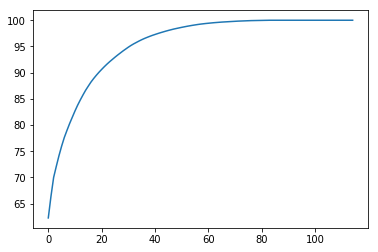

In [73]:
#Import library for PCA
from sklearn.decomposition import PCA

#Converting data to numpy array
X = df.values

# Data has 116 variables so no of components of PCA = 115
pca = PCA(n_components=115)
pca.fit(X)

# Proportion of variance explained
variance_explained = pca.explained_variance_ratio_

# Cumulative scree plot
var1 = np.cumsum(np.round(variance_explained, decimals=4)*100)

#Draw the plot
plt.plot(var1)
plt.show()

In [74]:
#Selecting 45 components since it explains almost 95+ % data variance
pca = PCA(n_components=45)

#Fitting the selected components to the data
pca.fit(X)

#Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state = 1)

# Decision Tree


     predicted  actual
681        8.0     8.0
257        2.0     2.0
527        8.0     8.0
637        8.0     8.0
429        4.0     4.0

RMSE : 0.04905495499794833
R^2 : 0.999788257947019
MAPE : 0.24245967758501846
Accuracy : 99.75754032241498


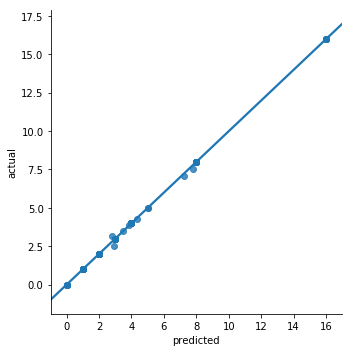

In [75]:
#Build decsion tree using DecisionTreeRegressor
c50_model = DecisionTreeRegressor(random_state = 1, max_depth = 8, min_samples_split = 4).fit(X_train,y_train)

#Perdict for test cases
c50_predictions = c50_model.predict(X_test)

#Create data frame for actual and predicted values
decision_tree_eval = pd.DataFrame({'predicted':c50_predictions, 'actual': y_test})
print(decision_tree_eval.head())

print()

#Calculate RMSE and R-squared value
print("RMSE : "+str(RMSE(y_test, c50_predictions)))
print("R^2 : "+str(r2_score(y_test, c50_predictions)))
print("MAPE : "+str(MAPE(y_test, c50_predictions)))
print("Accuracy : "+str(ACCURACY(MAPE(y_test, c50_predictions))))


#Scatter plot of Actual vs Predicted for Decision Tree
ax = sns.lmplot(x="predicted", y="actual", data=decision_tree_eval)

# Random Forest


     predicted  actual
681   8.000000     8.0
257   1.999581     2.0
527   8.000000     8.0
637   8.000000     8.0
429   4.002090     4.0

RMSE : 0.045726379041610726
R^2 : 0.9998160181504969


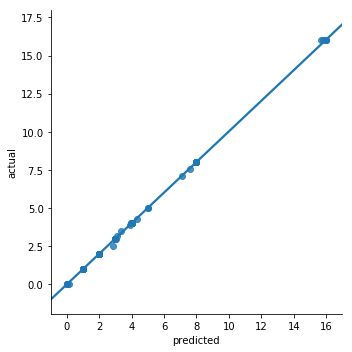

In [77]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

#Build random forest using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 1000, random_state = 1).fit(X_train,y_train)

#Perdict for test cases
rf_predictions = rf_model.predict(X_test)

#Comparison Dataframe for Random Forest
randomforest_eval = pd.DataFrame({'predicted':rf_predictions, 'actual': y_test})
print(randomforest_eval.head())

print()
#Calculate RMSE and R-squared value
print("RMSE : "+str(RMSE(y_test, rf_predictions)))
print("R^2 : "+str(r2_score(y_test, rf_predictions)))

#Scatter plot of Actual vs Predicted for Random Forest
ax = sns.lmplot(x="predicted", y="actual", data=randomforest_eval)

# Linear Regression


                             Names  Coefficients
0           Transportation expense  7.633204e-15
1  Distance from Residence to Work  6.586410e-09
2                     Service time -3.339551e-13
3                              Age  3.556313e-14
4           Work load Average/day  -1.387779e-16

     predicted  actual
681        8.0     8.0
257        2.0     2.0
527        8.0     8.0
637        8.0     8.0
429        4.0     4.0

RMSE : 0.002071996497832936
R^2 : 0.9999996222370247


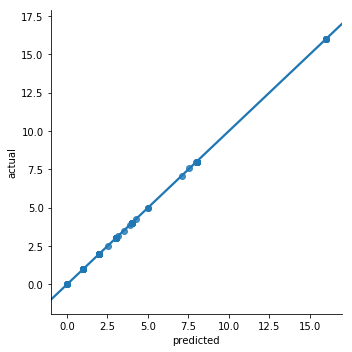

In [79]:
#Train the model
linear_regressor = LinearRegression().fit(X_train , y_train)

#Predict for test cases
linear_predictions = linear_regressor.predict(X_test)

#Get Linear Regression Equation along with Co-efficients
df_linear_coeff = pd.DataFrame(zip(df.columns, linear_regressor.coef_.tolist()), columns=['Names', 'Coefficients'])
print(df_linear_coeff.head())

print()

#Create data frame for actual and predicted values
linear_eval = pd.DataFrame({'predicted':linear_predictions, 'actual': y_test})
print(linear_eval.head())

print()

#Calculate RMSE and R-squared value
print("RMSE : "+str(RMSE(y_test, linear_predictions)))
print("R^2 : "+str(r2_score(y_test, linear_predictions)))


#Scatter plot of Actual vs Predicted for Random Forest
ax = sns.lmplot(x="predicted", y="actual", data=linear_eval)

# XG Boost


RMSE : 0.03830718094389552
R^2 : 0.9998708775545888


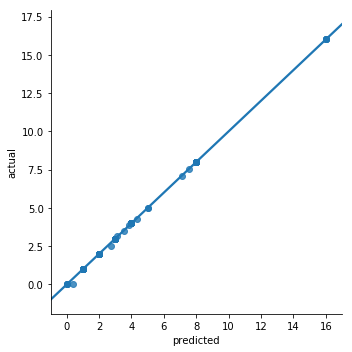

In [80]:
# Creating Model with parameters
xgb = xgboost.XGBRegressor(n_estimators=1000, booster='gbtree', learning_rate=0.05, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7, nthread=3)

# Train the model with data
xgb.fit(X_train,y_train)

# Test cases
xgb_predictions = xgb.predict(X_test)

#Comparison Dataframe for XG Boost
xgboost_eval = pd.DataFrame({'predicted':xgb_predictions, 'actual': y_test})

#Calculate RMSE and R-squared value
print("RMSE : "+str(RMSE(y_test, xgb_predictions)))
print("R^2 : "+str(r2_score(y_test, xgb_predictions)))

#Scatter plot of Actual vs Predicted for XG Boost
ax = sns.lmplot(x="predicted", y="actual", data=xgboost_eval)